In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import cross_validate, learning_curve, train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_excel('JamaicaCommercialDataGrid.xlsx')
df

FileNotFoundError: [Errno 2] No such file or directory: 'JamaicaCommercialDataGrid.xlsx'

In [2]:
import numpy_financial as nf

cf = [-10_000_000, 1_000_000, 1_050_000, 1_102_500, 1_157_625, 1_157_625 + 1_157_625/0.05]
hurdle = 0.08

npv = nf.npv(hurdle, cf)
irr = nf.irr(cf)

print(f"NPV @ {hurdle:.1%} = ${npv:,.0f}")
print(f"IRR = {irr:.1%}")


NPV @ 8.0% = $10,097,283
IRR = 26.3%


In [3]:
import numpy as np

base_cost = 10e6
for pct in [0.9, 1.0, 1.1]:
    cf[0] = -base_cost * pct
    print(pct, "cost → IRR:", nf.irr(cf))


0.9 cost → IRR: 0.2947442661227544
1.0 cost → IRR: 0.26348082959402896
1.1 cost → IRR: 0.23609488590513106


In [4]:
# Linear Regression

In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 2. Load & prepare your time series (e.g. rental vacancy rate)
df = pd.read_csv("Queens_Housing_2010_2023_Wide.csv")
df["Year"] = pd.to_datetime(df["Year"], format="%Y")

# Convert to Prophet’s expected columns: ds (date) & y (value)
ts = (
    df[["Year", "HOUSING OCCUPANCY - Rental vacancy rate"]]
      .rename(columns={"Year":"ds", "HOUSING OCCUPANCY - Rental vacancy rate":"y"})
)

# If the series is in “40.5%” format, strip % and convert to float
if ts["y"].dtype == object:
    ts["y"] = ts["y"].str.rstrip("%").astype(float) / 100

# 3. Fit the model
m = Prophet(yearly_seasonality=True, interval_width=0.95)
m.fit(ts)

# 4. Make a future dataframe (next 5 years)
future = m.make_future_dataframe(periods=5, freq="Y")

# 5. Forecast
forecast = m.predict(future)

# 6. Plot
fig = m.plot(forecast)
plt.title("Prophet Forecast of Queens Rental Vacancy Rate")
plt.ylabel("Vacancy Rate")
plt.show()

# 7. Inspect prediction intervals
print(forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail())


FileNotFoundError: [Errno 2] No such file or directory: 'Queens_Housing_2010_2023_Wide.csv'

10:20:09 - cmdstanpy - INFO - Chain [1] start processing
10:20:09 - cmdstanpy - INFO - Chain [1] done processing


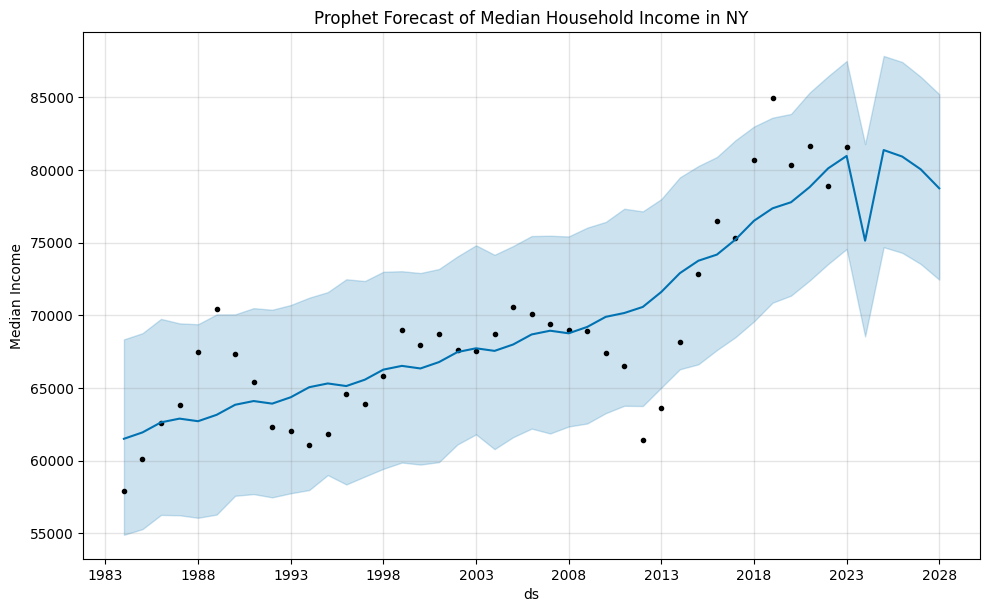

In [6]:
# Median Household Income NY analysis
df_income = pd.read_csv("MedianHouseholdIncome.csv")
df_income["observation_date"] = pd.to_datetime(df_income["observation_date"])
df_income = df_income.rename(columns={"observation_date": "ds", "MEHOINUSNYA672N": "y"})
m_income = Prophet(yearly_seasonality=True, interval_width=0.95)
m_income.fit(df_income)
future_income = m_income.make_future_dataframe(periods=5, freq="YE")
forecast_income = m_income.predict(future_income)
fig_income = m_income.plot(forecast_income)
plt.title("Prophet Forecast of Median Household Income in NY")
plt.ylabel("Median Income")
plt.show()

In [16]:
jamaicaOneBr = pd.read_excel("CompassJamaica1B.xlsx")
jamaicaTwoBr = pd.read_excel("CompassJamaica2B.xlsx")
jamaicaThreeBr = pd.read_excel("CompassJamaica3B.xlsx")
jamaicaFourBr = pd.read_excel("CompassJamaica4B.xlsx")

In [8]:
# Dropping rows with NaN in "Total Square Feet" for 1-bedroom properties 
jamaicaOneBrnonan = jamaicaOneBr[jamaicaOneBr["Beds"] == 1].dropna(subset=["Total Square Feet"])
jamaicaOneBrnonan["Total Square Feet"].describe()

count      207.000000
mean       898.623188
std       1426.999528
min          0.000000
25%        674.000000
50%        750.000000
75%        860.000000
max      20728.000000
Name: Total Square Feet, dtype: float64

In [9]:
FloorAreaMedian = jamaicaOneBr["Total Square Feet"].median()
FloorAreaMedian

750.0

In [10]:
Onebr_nonan = jamaicaOneBr[jamaicaOneBr["Beds"] == 1].dropna(subset=["Total Square Feet"])

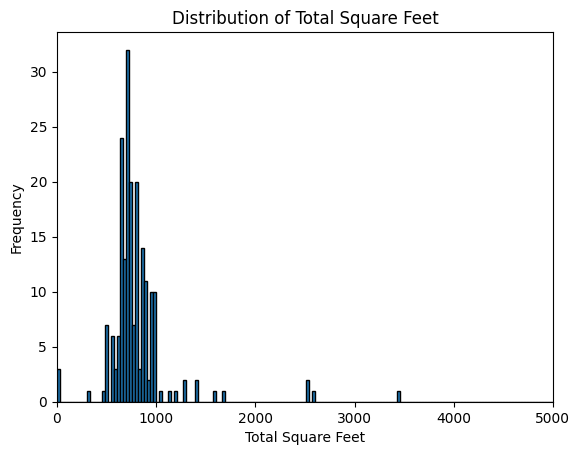

In [11]:
plt.hist(Onebr_nonan["Total Square Feet"], bins=684, edgecolor='black')
plt.xlim(0, 5000)
plt.title("Distribution of Total Square Feet")
plt.xlabel("Total Square Feet")
plt.ylabel("Frequency")
plt.show()


In [15]:
nycdf = pd.read_excel("CompassNYCHousingData.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'CompassNYCHousingData.xlsx'

In [13]:
len(nycdf)

NameError: name 'nycdf' is not defined

In [14]:
nycdfnonan = nycdf.dropna(subset=["Total Square Feet"])

NameError: name 'nycdf' is not defined

In [37]:
nycdf = pd.read_excel("CompassNYCHousingData.xlsx")
nycdfOneBedroom = nycdfnonan[nycdfnonan["Beds"] == 1]
plt.hist(nycdfOneBedroom["Total Square Feet"], bins=5041, edgecolor='black')
plt.xlim(0, 5000)
plt.title("Distribution of Total Square Feet")
plt.xlabel("Total Square Feet")
plt.ylabel("Frequency")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'CompassNYCHousingData.xlsx'

In [ ]:
# Hypothesis Testing 
# We can either use parametric test or non-parametric test. There are a few assumptions for parametric tests: 1. Normality, 2. Homogeneity of variance 3. The mean is meaningful
# Here, we will use t-test and u-test to compare the means and distributions of two groups: 1-bedroom apartments in Jamaica and NYC.

# Use t-test to compare means of two groups
a = Onebr_nonan["Total Square Feet"].dropna()
b = nycdfOneBedroom["Total Square Feet"].dropna()
print(a.shape, b.shape)
t_stat, p_value = stats.ttest_ind(a, b, equal_var=False)
from scipy import stats
t_stat, p_value = stats.ttest_ind(a, b, equal_var=False)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: means are significantly different.")
else:
    print("Fail to reject the null hypothesis: means are not significantly different.")
# This indicates that the average square footage of 1-bedroom apartments is significantly different from that of

# Use u-test to compare distributions
u_stat, p_value = stats.mannwhitneyu(a, b, alternative='two-sided')
print(f"U-statistic: {u_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: distributions are not significantly different.")


NameError: name 'nycdfOneBedroom' is not defined

In [41]:
jamaica3Br = pd.read_excel("CompassJamaica3Br.xlsx")

In [42]:
jamaica4Br = pd.read_excel("CompassJamaica4Br.xlsx")

In [24]:
nycdf = pd.read_excel("CompassHousingDataSet.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'CompassHousingDataSet.xlsx'